In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from langdetect import detect

In [2]:
data = pd.read_csv("../Data/Twitter.csv", header=None, encoding='latin-1')
data.columns = ['Sentiment', 'ID', 'Date', 'Query', 'User', 'Tweet']
data.head()

,Sentiment,ID,Date,Query,User,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
data.dtypes

Sentiment     int64
ID            int64
Date         object
Query        object
User         object
Tweet        object
dtype: object

In [4]:
#Create a list of all words in all tweets
word_list = []
for string in data['Tweet']:
    word_list.extend(string.split())
word_list

['@switchfoot',
 'http://twitpic.com/2y1zl',
 '-',
 'Awww,',
 "that's",
 'a',
 'bummer.',
 'You',
 'shoulda',
 'got',
 'David',
 'Carr',
 'of',
 'Third',
 'Day',
 'to',
 'do',
 'it.',
 ';D',
 'is',
 'upset',
 'that',
 'he',
 "can't",
 'update',
 'his',
 'Facebook',
 'by',
 'texting',
 'it...',
 'and',
 'might',
 'cry',
 'as',
 'a',
 'result',
 'School',
 'today',
 'also.',
 'Blah!',
 '@Kenichan',
 'I',
 'dived',
 'many',
 'times',
 'for',
 'the',
 'ball.',
 'Managed',
 'to',
 'save',
 '50%',
 'The',
 'rest',
 'go',
 'out',
 'of',
 'bounds',
 'my',
 'whole',
 'body',
 'feels',
 'itchy',
 'and',
 'like',
 'its',
 'on',
 'fire',
 '@nationwideclass',
 'no,',
 "it's",
 'not',
 'behaving',
 'at',
 'all.',
 "i'm",
 'mad.',
 'why',
 'am',
 'i',
 'here?',
 'because',
 'I',
 "can't",
 'see',
 'you',
 'all',
 'over',
 'there.',
 '@Kwesidei',
 'not',
 'the',
 'whole',
 'crew',
 'Need',
 'a',
 'hug',
 '@LOLTrish',
 'hey',
 'long',
 'time',
 'no',
 'see!',
 'Yes..',
 'Rains',
 'a',
 'bit',
 ',only',

In [5]:
#Count occurance of each word in all Tweets
word_counts = {}
for word in word_list:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

#Sort words by occurance
word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
word_counts

[('to', 552962),
 ('I', 496619),
 ('the', 487501),
 ('a', 366212),
 ('my', 280025),
 ('and', 275263),
 ('i', 250016),
 ('is', 217693),
 ('you', 213871),
 ('for', 209801),
 ('in', 202294),
 ('of', 179554),
 ('it', 171812),
 ('on', 154365),
 ('have', 132249),
 ('so', 125155),
 ('me', 122509),
 ('that', 118685),
 ('with', 110843),
 ('be', 108069),
 ('but', 106272),
 ('at', 102196),
 ("I'm", 99559),
 ('was', 99140),
 ('just', 96284),
 ('not', 88110),
 ('this', 77810),
 ('get', 76734),
 ('like', 73302),
 ('are', 72568),
 ('up', 70007),
 ('all', 67901),
 ('-', 67079),
 ('out', 67030),
 ('go', 62969),
 ('your', 60854),
 ('good', 59775),
 ('day', 55748),
 ('do', 54628),
 ('from', 54182),
 ('got', 53871),
 ('now', 53591),
 ('going', 53236),
 ('love', 50051),
 ('no', 49622),
 ('about', 46708),
 ('work', 45913),
 ('will', 45898),
 ('back', 44033),
 ('u', 43568),
 ("it's", 43422),
 ('some', 42745),
 ('am', 42724),
 ('can', 42506),
 ("don't", 42472),
 ('really', 42152),
 ('had', 41548),
 ('see', 41

In [6]:
data_pos = data[data['Sentiment'] == 4]
data_neg = data[data['Sentiment'] == 0]

In [7]:
#Create a list of all words in all tweets
word_list_pos = []
for string in data_pos['Tweet']:
    word_list_pos.extend(string.split())

#Count occurance of each word in all Tweets
word_counts_pos = {}
for word in word_list_pos:
    if word in word_counts_pos:
        word_counts_pos[word] += 1
    else:
        word_counts_pos[word] = 1

#Sort words by occurance
word_counts_pos = sorted(word_counts_pos.items(), key=lambda x: x[1], reverse=True)
word_counts_pos[:100]

[('the', 246501),
 ('to', 246444),
 ('I', 196797),
 ('a', 190388),
 ('you', 138383),
 ('and', 135023),
 ('for', 113503),
 ('my', 113108),
 ('is', 99567),
 ('in', 93873),
 ('i', 89884),
 ('of', 88640),
 ('it', 80725),
 ('on', 76800),
 ('with', 62629),
 ('that', 56777),
 ('have', 54373),
 ('me', 53162),
 ('so', 52417),
 ('be', 51431),
 ('just', 46314),
 ('at', 44843),
 ("I'm", 43364),
 ('was', 43009),
 ('-', 42160),
 ('your', 41253),
 ('are', 40703),
 ('good', 39646),
 ('but', 38005),
 ('love', 36784),
 ('like', 34667),
 ('this', 34197),
 ('all', 32971),
 ('get', 32626),
 ('up', 30836),
 ('out', 30792),
 ('day', 28987),
 ('from', 26949),
 ('not', 26723),
 ('will', 25485),
 ('do', 25193),
 ('some', 25062),
 ('u', 24617),
 ('can', 24441),
 ('got', 24346),
 ('going', 24269),
 ('go', 22701),
 ('now', 22598),
 ('see', 22340),
 ('new', 22274),
 ('about', 22145),
 ('&amp;', 21812),
 ('we', 20751),
 ('know', 20391),
 ("it's", 20312),
 ('time', 20249),
 ('what', 19927),
 ('one', 19721),
 ('if', 1

In [8]:
#Create a list of all words in all tweets
word_list_neg = []
for string in data_neg['Tweet']:
    word_list_neg.extend(string.split())

#Count occurance of each word in all Tweets
word_counts_neg = {}
for word in word_list_neg:
    if word in word_counts_neg:
        word_counts_neg[word] += 1
    else:
        word_counts_neg[word] = 1

#Sort words by occurance
word_counts_neg = sorted(word_counts_neg.items(), key=lambda x: x[1], reverse=True)
word_counts_neg[:100]

[('to', 306518),
 ('I', 299822),
 ('the', 241000),
 ('a', 175824),
 ('my', 166917),
 ('i', 160132),
 ('and', 140240),
 ('is', 118126),
 ('in', 108421),
 ('for', 96298),
 ('it', 91087),
 ('of', 90914),
 ('have', 77876),
 ('on', 77565),
 ('you', 75488),
 ('so', 72738),
 ('me', 69347),
 ('but', 68267),
 ('that', 61908),
 ('not', 61387),
 ('at', 57353),
 ('be', 56638),
 ("I'm", 56195),
 ('was', 56131),
 ('just', 49970),
 ('with', 48214),
 ('get', 44108),
 ('this', 43613),
 ('go', 40268),
 ('up', 39171),
 ('like', 38635),
 ('out', 36238),
 ('no', 36004),
 ('all', 34930),
 ('work', 32855),
 ('are', 31865),
 ('now', 30993),
 ('got', 29525),
 ('do', 29435),
 ('going', 28967),
 ("don't", 28903),
 ('miss', 28401),
 ('want', 27983),
 ('from', 27233),
 ('day', 26761),
 ('really', 26754),
 ("can't", 26290),
 ('back', 25908),
 ('-', 24919),
 ('too', 24887),
 ('am', 24662),
 ('about', 24563),
 ('had', 24532),
 ('still', 23407),
 ('im', 23122),
 ("it's", 23110),
 ('one', 21361),
 ('know', 20947),
 ('f

In [9]:
#Create dataframes with words and occurance
df_word_counts_pos = pd.DataFrame(word_counts_pos)
df_word_counts_neg = pd.DataFrame(word_counts_neg)

In [10]:
#Show top unique words in positive tweets
merged_pos = pd.merge(df_word_counts_pos.head(200), df_word_counts_neg.head(200), how='left', on=[0], indicator=True)
unique_pos = merged_pos[merged_pos['_merge'] == 'left_only'].drop(columns=['_merge', '1_y'])
unique_pos.columns = ['Word', 'Count']
unique_pos

,Word,Count
62,great,17715
78,thanks,14308
79,You,14162
85,Good,13131
95,nice,11772
101,Thanks,11552
108,happy,11255
113,haha,10897
119,you're,10061
127,!,9147


In [11]:
#Show top unique words in negative tweets
merged_neg = pd.merge(df_word_counts_neg.head(200), df_word_counts_pos.head(200), how='left', on=[0], indicator=True)
unique_neg = merged_neg[merged_neg['_merge'] == 'left_only'].drop(columns=['_merge', '1_y'])
unique_neg.columns = ['Word', 'Count']
unique_neg

,Word,Count
41,miss,28401
77,sad,18418
79,wish,18192
86,bad,16522
93,hate,15239
97,didn't,13426
107,why,12159
113,sorry,11953
118,dont,11611
122,wanna,11156


In [12]:
data['Words'] = data['Tweet'].str.split().str.len()
data

,Sentiment,ID,Date,Query,User,Tweet,Words
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",19
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,21
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,18
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,10
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",21
...,...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,11
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,11
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,11
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,12


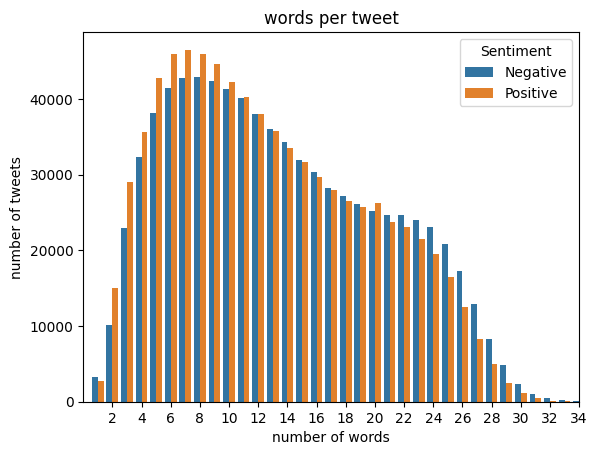

In [16]:
sns.countplot(data, x='Words', hue='Sentiment')
plt.xlim(-1,30)
plt.title('words per tweet')
plt.xlabel('number of words')
plt.xticks([1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33])
plt.ylabel('number of tweets')
plt.legend(title='Sentiment', loc='upper right', labels=['Negative', 'Positive'])

Tweets with positive sentiment tend to have less words than negative.

In [17]:
data['Exclamation'] = data['Tweet'].str.count('!')
data

,Sentiment,ID,Date,Query,User,Tweet,Words,Exclamation
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",19,0
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,21,1
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,18,0
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,10,0
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",21,0
...,...,...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,11,0
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,11,1
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,11,0
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,12,3


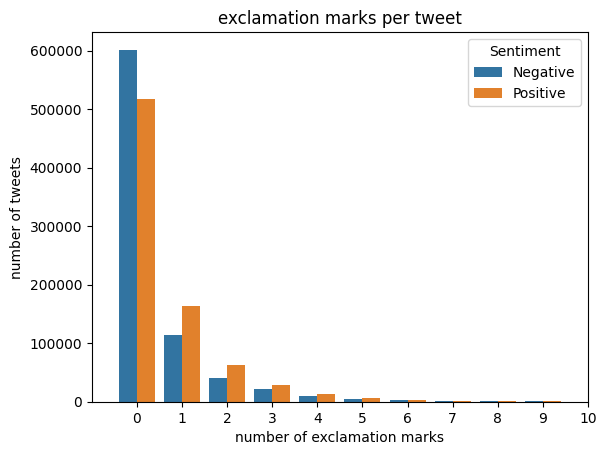

In [18]:
sns.countplot(data, x='Exclamation', hue='Sentiment')
plt.xlim(-1,10)
plt.title('exclamation marks per tweet')
plt.xlabel('number of exclamation marks')
plt.ylabel('number of tweets')
plt.legend(title='Sentiment', loc='upper right', labels=['Negative', 'Positive'])

Tweets with exclamation marks tend to be more positive.

In [19]:
data['Question'] = data['Tweet'].str.count('\?')
data

,Sentiment,ID,Date,Query,User,Tweet,Words,Exclamation,Question
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",19,0,0
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,21,1,0
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,18,0,0
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,10,0,0
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",21,0,1
...,...,...,...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,11,0,0
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,11,1,0
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,11,0,1
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,12,3,0


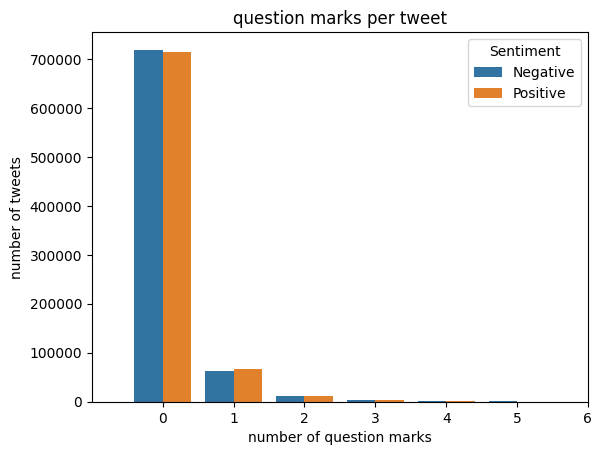

In [20]:
sns.countplot(data, x='Question', hue='Sentiment')
plt.xlim(-1,6)
plt.title('question marks per tweet')
plt.xlabel('number of question marks')
plt.ylabel('number of tweets')
plt.legend(title='Sentiment', loc='upper right', labels=['Negative', 'Positive'])

Question marks don't have a strong correlation with sentiment

In [21]:
data['At'] = data['Tweet'].str.count('\@')
data

,Sentiment,ID,Date,Query,User,Tweet,Words,Exclamation,Question,At
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",19,0,0,1
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,21,1,0,0
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,18,0,0,1
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,10,0,0,0
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",21,0,1,1
...,...,...,...,...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,11,0,0,0
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,11,1,0,0
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,11,0,1,0
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,12,3,0,0


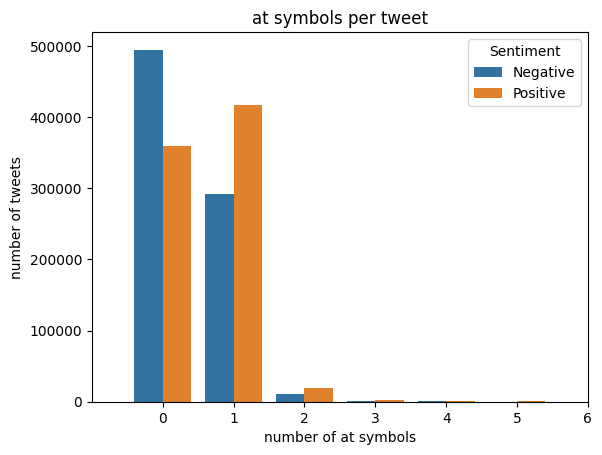

In [31]:
sns.countplot(data, x='At', hue='Sentiment')
plt.xlim(-1,6)
plt.title('at symbols per tweet')
plt.xlabel('number of at symbols')
plt.ylabel('number of tweets')
plt.legend(title='Sentiment', loc='upper right', labels=['Negative', 'Positive'])

Tweets with an at symbol (someone tagged) tend to be more positive.

In [24]:
data['Link'] = data['Tweet'].str.count('http')
data

,Sentiment,ID,Date,Query,User,Tweet,Words,Exclamation,Question,At,Link
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",19,0,0,1,1
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,21,1,0,0,0
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,18,0,0,1,0
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,10,0,0,0,0
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",21,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,11,0,0,0,0
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,11,1,0,0,1
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,11,0,1,0,0
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,12,3,0,0,0


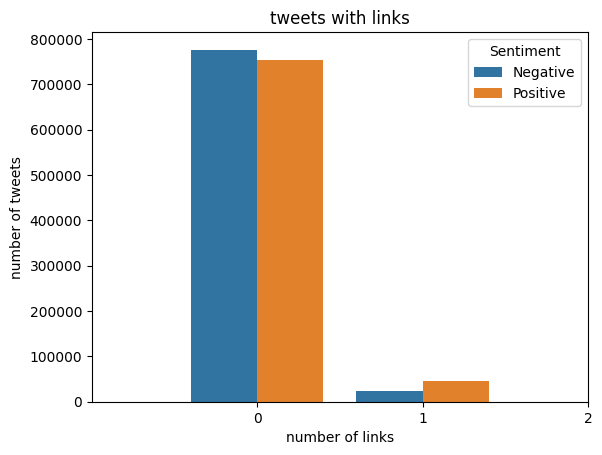

In [25]:
sns.countplot(data, x='Link', hue='Sentiment')
plt.xlim(-1,2)
plt.title('tweets with links')
plt.xlabel('number of links')
plt.ylabel('number of tweets')
plt.legend(title='Sentiment', loc='upper right', labels=['Negative', 'Positive'])

In [29]:
link_pos = ((data['Sentiment'] == 4) & (data['Link'] == 1)).sum()
link_neg = ((data['Sentiment'] == 0) & (data['Link'] == 1)).sum()
print((link_neg / (link_pos + link_neg))*100, '% of all tweets with a link are negative')

34.29098194065385 % of all tweets with a link are negative


Tweets with a link tend to be more positive.